In [7]:
pip install beautifulsoup4

In [8]:
pip install requests

In [9]:
pip install fake_useragent

In [15]:
import requests
from bs4 import BeautifulSoup
import csv
from fake_useragent import UserAgent
import time
import random

# Send request to the page
url = "https://www.scrapethissite.com/pages/forms/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [16]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robo

In [18]:
import pandas as pd

In [20]:
ua = UserAgent()

table = soup.find('table')
rows = table.find_all('tr')

data = []

# Loop through all rows
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

columns = ["Team Name", "Year", "Wins", "Losses", "OT Losses", "Win %", "Goals For (GF)", "Goals Against (GA)", "+ / -"]

df = pd.DataFrame(data, columns=columns)

df.to_csv('scraped_data.csv', index=False)
print("Data saved to 'scraped_data.csv'")

Data saved to 'scraped_data.csv'


In [22]:
df = pd.read_csv('scraped_data.csv')
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [23]:
df['OT Losses'].fillna(0, inplace=True)

<ipython-input-23-06a71faaa31a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OT Losses'].fillna(0, inplace=True)


In [24]:
df['Win %'] = df['Win %'].clip(0, 1)

In [25]:
df['Goals For (GF)'] = df['Goals For (GF)'].clip(lower=0)
df['Goals Against (GA)'] = df['Goals Against (GA)'].clip(lower=0)

In [26]:
df['Year'] = df['Year'].astype(int)
df['Wins'] = df['Wins'].astype(int)
df['Losses'] = df['Losses'].astype(int)
df['OT Losses'] = df['OT Losses'].astype(int)
df['Goals For (GF)'] = df['Goals For (GF)'].astype(int)
df['Goals Against (GA)'] = df['Goals Against (GA)'].astype(int)
df['+ / -'] = df['+ / -'].astype(int)

In [27]:
print(df)

                Team Name  Year  Wins  Losses  OT Losses  Win %  \
0           Boston Bruins  1990    44      24          0  0.550   
1          Buffalo Sabres  1990    31      30          0  0.388   
2          Calgary Flames  1990    46      26          0  0.575   
3      Chicago Blackhawks  1990    49      23          0  0.613   
4       Detroit Red Wings  1990    34      38          0  0.425   
5         Edmonton Oilers  1990    37      37          0  0.463   
6        Hartford Whalers  1990    31      38          0  0.388   
7       Los Angeles Kings  1990    46      24          0  0.575   
8   Minnesota North Stars  1990    27      39          0  0.338   
9      Montreal Canadiens  1990    39      30          0  0.487   
10      New Jersey Devils  1990    32      33          0  0.400   
11     New York Islanders  1990    25      45          0  0.312   
12       New York Rangers  1990    36      31          0  0.450   
13    Philadelphia Flyers  1990    33      37          0  0.41

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

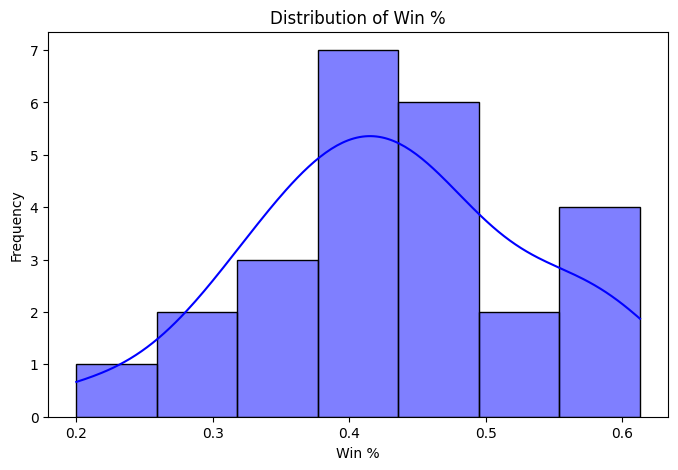

In [29]:
# 1. Plot distribution of 'Win %'
plt.figure(figsize=(8, 5))
sns.histplot(df['Win %'], kde=True, color='blue')
plt.title('Distribution of Win %')
plt.xlabel('Win %')
plt.ylabel('Frequency')
plt.show()

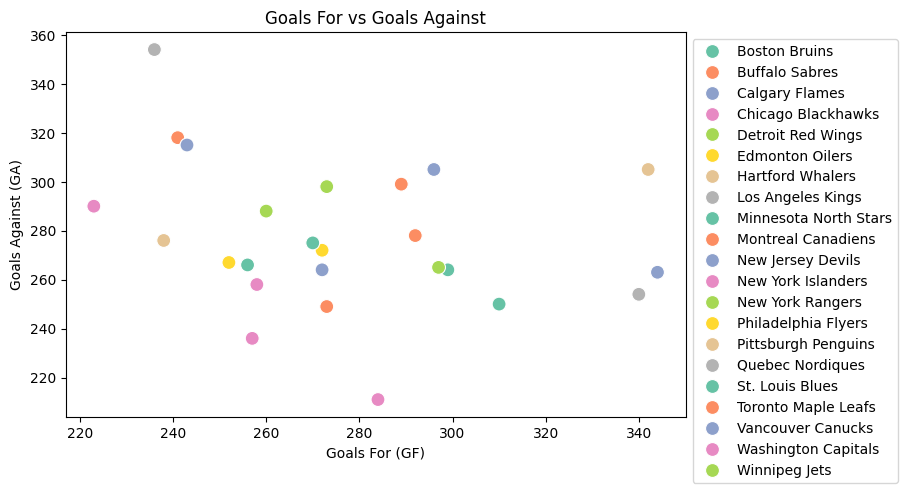

In [30]:
# 2. Scatter plot of Goals For (GF) vs Goals Against (GA)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Goals For (GF)', y='Goals Against (GA)', hue='Team Name', palette='Set2', s=100)
plt.title('Goals For vs Goals Against')
plt.xlabel('Goals For (GF)')
plt.ylabel('Goals Against (GA)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

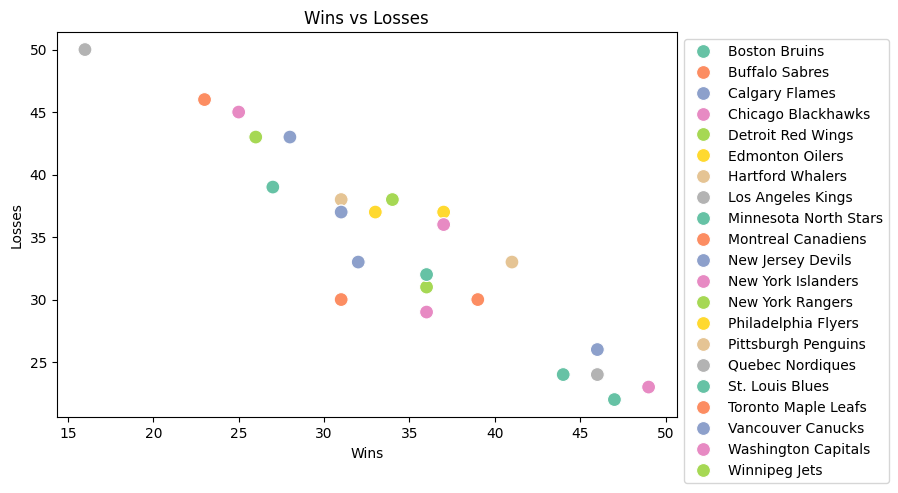

In [31]:
# 3. Wins vs Losses scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Wins', y='Losses', hue='Team Name', palette='Set2', s=100)
plt.title('Wins vs Losses')
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()